In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from scan_dataloader import CTPET_Dataset
from autoencoder_registration_model import AE_Registrator

In [5]:
train_dataset = CTPET_Dataset("dest_tryout")

train_parameters = {
    "batch_size": 1,
    "shuffle": True,
    "num_workers": 1,
}
training_loader = DataLoader(train_dataset, **train_parameters)

In [24]:
# encoder_size = [16, 8, 8, 16]
# decoder_size = [8, 8, 1]
encoder_size = [32, 16, 16, 32]
decoder_size = [16, 16, 1]
model = AE_Registrator(encoder_size, decoder_size)

In [66]:
model.load_state_dict(torch.load("./tmp_models/02.pt"))

<All keys matched successfully>

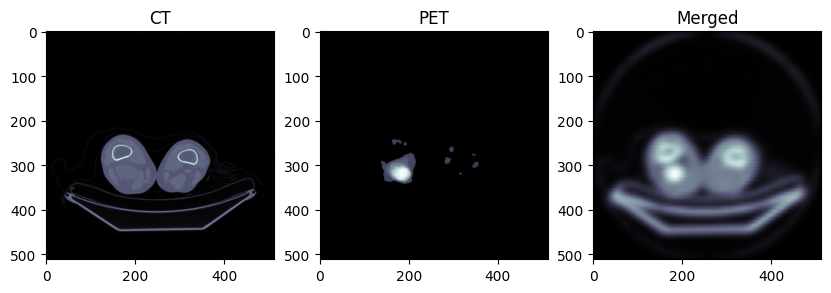

In [69]:
_, ax = plt.subplots(1, 3, figsize=(10, 10))
for batch in training_loader:
    X = batch["stacked"]
    ct = batch["CT"].detach()[0, :, :]
    pet = batch["PET"].detach()[0, :, :]

    pet[pet < 100] = 0

    Y = model(X)
    result = Y.detach()[0, 0, :, :]

    ax[0].imshow(ct, cmap=plt.cm.bone)
    ax[1].imshow(pet, cmap=plt.cm.bone)
    ax[2].imshow(result, cmap=plt.cm.bone)
    
    ax[0].set_title("CT")
    ax[1].set_title("PET")
    ax[2].set_title("Merged")
    plt.show()

    break
    

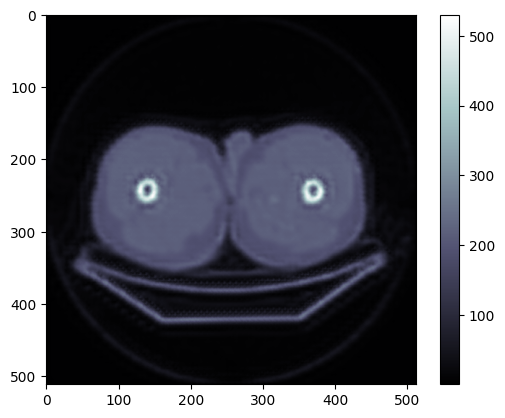

In [59]:
new_ct = ct.clone()
new_ct[new_ct < 100] = 0
# new_ct = nn.functional.normalize(new_ct)
plt.imshow(result, cmap=plt.cm.bone)
plt.colorbar()

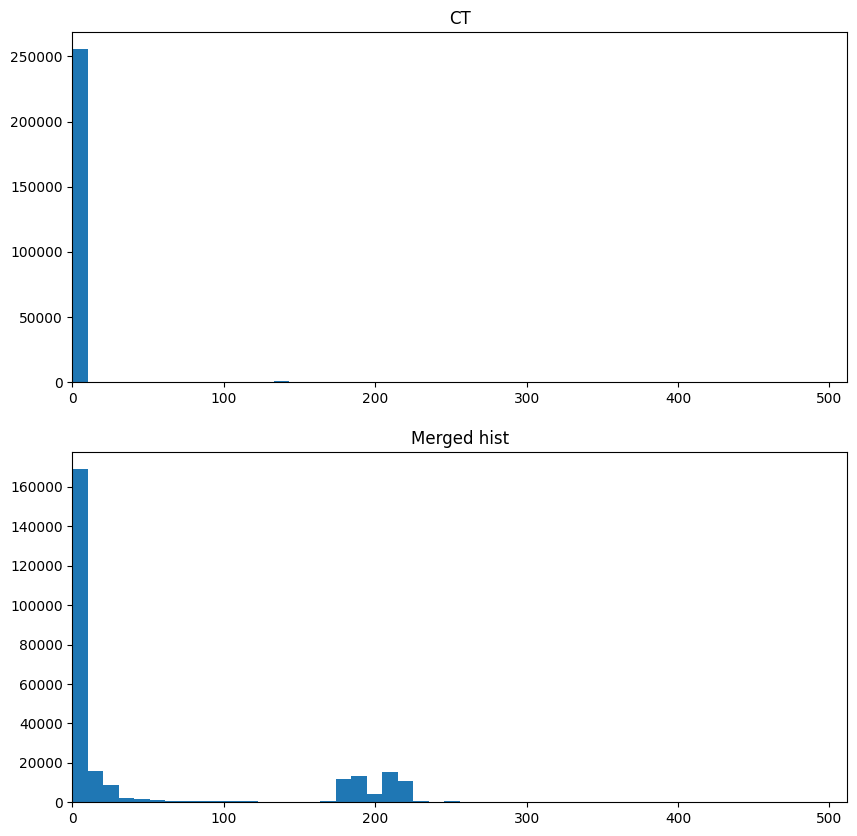

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))


# ax[0].hist(ct.flatten(), bins=50)
ax[0].hist(pet.flatten(), bins=50)
ax[0].set_title("CT")
ax[0].set_xlim(0, 512)
ax[1].hist(ct.flatten(), bins=50)
ax[1].set_title("Merged hist")
ax[1].set_xlim(0, 512)
plt.show()